In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [2]:
date_parser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")
covid_df = pd.read_csv('COVID-19 dataset.csv', parse_dates=['date'], date_parser=date_parser)
print(f'This dataset contains {covid_df.shape[0]} rows and {covid_df.shape[1]} columns')
print(f'The dataset records Covid-19 cases from several countries from {covid_df["date"].min()} to {covid_df["date"].max()}')
print(f'The time range for the dataset is {str(covid_df["date"].max() - covid_df["date"].min()).split()[0]} days')

This dataset contains 11368 rows and 8 columns
The dataset records Covid-19 cases from several countries from 2020-01-01 00:00:00 to 2021-02-09 00:00:00
The time range for the dataset is 405 days


<ipython-input-2-bf6e82472f4e>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date_parser = lambda x: pd.datetime.strptime(x, "%Y-%m-%d")


In [3]:
covid_df.head(2)

,Unnamed: 0,date,cases,deaths,CountryCode,RegionName,new_cases,new_deaths
0,1,2020-01-01,0,0,AUS,National,0,0
1,2,2020-01-02,0,0,AUS,National,0,0


In [4]:
country_label = {'AUS' : 'Australia', 'USA' : 'United States', 'GBR' : 'United Kingdom', 'ARE' : 'United Arab Emirates',
                 'CAN' : 'Canada' , 'CHL' : 'Chile', 'DEU' : 'Germany', 'ESP' : 'Spain', 'FRA' : 'France', 'IND' :'India',
                 'ITA' : 'Italy', 'JPN' : 'Japan', 'KOR' : 'Korea', 'NOR' :' Norway', 'NZL' : 'New Zealand', 'SGP' : 'Singapore',
                 'SWE' : 'Sweden', 'THA' : 'Thailand', 'TUN' : 'Tunisia', 'TWN' : 'Taiwan', 'ZAF' : 'South Africa'}
countries = ', '.join([country_label[x] for x in covid_df["CountryCode"].unique()])

print(f'Number of countries involved in the dataset : {len(covid_df["CountryCode"].unique())}')
print(f'Countries involved in the dataset : {countries}')
print(f'Number of datasets of from each country : \n{covid_df["CountryCode"].value_counts()}')

Number of countries involved in the dataset : 21
Countries involved in the dataset : Australia, United States, United Kingdom, United Arab Emirates, Canada, Chile, Germany, Spain, France, India, Italy, Japan, Korea,  Norway, New Zealand, Singapore, Sweden, Thailand, Tunisia, Taiwan, South Africa
Number of datasets of from each country : 
USA    1624
AUS    1624
CAN     812
CHL     406
ITA     406
SGP     406
IND     406
NZL     406
TUN     406
ZAF     406
TWN     406
JPN     406
SWE     406
DEU     406
THA     406
GBR     406
ESP     406
NOR     406
FRA     406
KOR     406
ARE     406
Name: CountryCode, dtype: int64


In [5]:
print(f'Number of UNKNOWN in "cases" column : {len(covid_df["cases"].loc[covid_df["cases"] == "UNKNOWN"])}')
print(f'Number of UNKNOWN in "deaths" column : {len(covid_df["deaths"].loc[covid_df["deaths"] == "UNKNOWN"])}')
print(f'Number of UNKNOWN in "new_cases" column : {len(covid_df["new_cases"].loc[covid_df["new_cases"] == "UNKNOWN"])}')
print(f'Number of UNKNOWN in "new_deaths" column : {len(covid_df["new_deaths"].loc[covid_df["new_deaths"] == "UNKNOWN"])}')

Number of UNKNOWN in "cases" column : 206
Number of UNKNOWN in "deaths" column : 212
Number of UNKNOWN in "new_cases" column : 210
Number of UNKNOWN in "new_deaths" column : 217


In [6]:
covid_df['cases'].replace({'UNKNOWN' : np.nan}, inplace=True)
covid_df['deaths'].replace({'UNKNOWN' : np.nan}, inplace=True)
covid_df['new_cases'].replace({'UNKNOWN' : np.nan}, inplace=True)
covid_df['new_deaths'].replace({'UNKNOWN' : np.nan}, inplace=True)

In [7]:
convert_dict = {'cases' : float,
                'deaths' : float,
                'new_cases' : float,
                'new_deaths' : float}
covid_df = covid_df.astype(convert_dict)

In [8]:
def get_countries_df(df, country_code):
  output = df.set_index('date')
  filter = output['CountryCode'].astype(str).apply(lambda x: str(x) == country_code)
  output = output[filter]
  return output

def plot_countries(country_df, country_code):
  country_df['cases'].plot()
  country_df['new_cases'].plot()
  plt.legend()
  plt.title('Cases and new cases in '+ country_label[country_code])

def plot_countries_by_month(country_df, country_code, resampling='M'):
  df_month = country_df.resample(resampling).agg({'cases' : 'mean',
                                                  'deaths' : 'mean',
                                                  'new_cases' : 'sum',
                                                  'new_deaths' : 'sum'})
  if resampling == 'M' :
    label = 'month'
  elif resampling == 'W' : 
    label = 'week'
  elif resampling == 'D' : 
    label = 'day'
  elif resampling == 'Y' :
    label = 'year'
  df_month.rename({'cases' : 'Average Cases per ' + label,
                            'deaths' : 'Average Deaths per ' + label,
                            'new_cases' : 'Total New Cases per ' + label,
                            'new_deaths' : ' Total New Deaths per ' + label}, axis=1, inplace=True)
  df_month.plot()
  plt.ylabel('Frequency')
  plt.title(f'Statistics of COVID-19 for each {label} in {country_label[country_code]}')
  plt.legend(bbox_to_anchor=(1.2, 1))

def get_statistics_country(country_df, resampling='M'):
  df_month = country_df.resample(resampling).agg({'cases':['mean', 'median', 'min', 'max', 'sum'],
                                                  'deaths':['mean', 'median', 'min', 'max', 'sum'],
                                                  'new_cases':['mean', 'median', 'min', 'max', 'sum'],
                                                  'new_deaths':['mean', 'median', 'min', 'max', 'sum']})
  return df_month

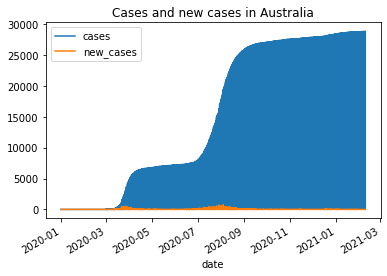

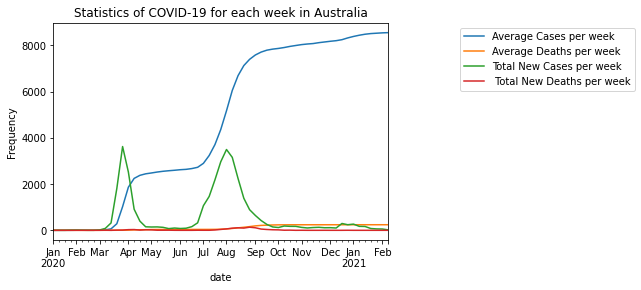

In [9]:
aus_df = get_countries_df(covid_df, 'AUS')
plot_countries(aus_df, 'AUS')
plot_countries_by_month(aus_df, 'AUS', 'W')

In [10]:
get_statistics_country(aus_df)

cases                                        deaths         \
                   mean  median   min      max        sum        mean median   
date                                                                           
2020-01-31     0.491935     0.0   0.0      9.0       61.0    0.000000    0.0   
2020-02-29     4.715517     2.0   0.0     25.0      547.0    0.000000    0.0   
2020-03-31   420.491935    31.0   0.0   4559.0    52141.0    2.516129    0.0   
2020-04-30  2305.083333  1144.0  19.0   6766.0   276610.0   22.000000    6.0   
2020-05-31  2556.177419  1568.5  27.0   7202.0   316966.0   36.927419   22.0   
2020-06-30  2673.925000  1606.0  29.0   7920.0   320871.0   38.433333   25.5   
2020-07-31  3838.887097  1662.0  30.0  17280.0   476022.0   45.233871   26.0   
2020-08-31  6755.129032  1948.5  33.0  25819.0   837636.0  118.435484   26.5   
2020-09-30  7753.791667  2096.0  33.0  27096.0   930455.0  217.808333   27.5   
2020-10-31  7959.967742  2172.5  33.0  27595.0   987036.0  239.395161   28.0   
2020-11-30  8103.100000  2274.5  38.0  27912.0   972372.0  240.766667   28.0   
2020-12-31  8259.193548  2353.0  53.0  28425.0  1024140.0  241.080645   28.0   
2021-01-31  8483.790323  2532.5  75.0  28818.0  1051990.0  241.500000   28.5   
2021-02-28  8546.111111  2615.0  98.0  28871.0   307660.0  241.500000   28.5   

                                 new_cases                             \
            min    max      sum       mean median  min    max     sum   
date                                                                    
2020-01-31  0.0    0.0      0.0   0.104839    0.0  0.0    4.0    13.0   
2020-02-29  0.0    0.0      0.0   0.137931    0.0  0.0   10.0    16.0   
2020-03-31  0.0   18.0    312.0  53.709677    3.0  0.0  497.0  6660.0   
2020-04-30  0.0   93.0   2640.0  26.983333    3.0  0.0  303.0  3238.0   
2020-05-31  0.0  103.0   4579.0   4.169355    0.0  0.0   30.0   517.0   
2020-06-30  0.0  104.0   4612.0   6.900000    0.0  0.0   86.0   828.0   
2020-07-31  0.0  201.0   5609.0  80.153226    2.5  0.0  716.0  9939.0   
2020-08-31  0.0  657.0  14686.0  71.201613    0.5  0.0  715.0  8829.0   
2020-09-30  0.0  888.0  26137.0  12.008333    0.0  0.0  126.0  1441.0   
2020-10-31  0.0  907.0  29685.0   5.669355    1.0  0.0   38.0   703.0   
2020-11-30  0.0  908.0  28892.0   4.100000    1.0  0.0   38.0   492.0   
2020-12-31  0.0  909.0  29894.0   7.112903    2.0  0.0   42.0   882.0   
2021-01-31  0.0  909.0  29946.0   4.830645    2.0  0.0   35.0   599.0   
2021-02-28  0.0  909.0   8694.0   2.111111    1.0  0.0   11.0    76.0   

           new_deaths                           
                 mean median  min   max    sum  
date                                            
2020-01-31   0.000000    0.0  0.0   0.0    0.0  
2020-02-29   0.000000    0.0  0.0   0.0    0.0  
2020-03-31   0.217742    0.0  0.0   5.0   27.0  
2020-04-30   0.916667    0.0  0.0   8.0  110.0  
2020-05-31   0.137097    0.0  0.0   1.0   17.0  
2020-06-30   0.025000    0.0  0.0   1.0    3.0  
2020-07-31   0.790323    0.0  0.0  13.0   98.0  
2020-08-31   3.693548    0.0  0.0  41.0  458.0  
2020-09-30   1.933333    0.0  0.0  59.0  232.0  
2020-10-31   0.153226    0.0  0.0   5.0   19.0  
2020-11-30   0.008333    0.0  0.0   1.0    1.0  
2020-12-31   0.016129    0.0  0.0   1.0    2.0  
2021-01-31   0.000000    0.0  0.0   0.0    0.0  
2021-02-28   0.000000    0.0  0.0   0.0    0.0

In [11]:
measures_df = pd.read_csv('Measures.csv')

In [12]:
measures_df.head(10)

,CountryName,RegionName,CountryCode,SubRegionName,PolicyID,PolicyCategory,PolicyMeasure,MeasureID,StartDate,EndDate,Description,Unnamed: 11
0,Australia,Australian Capital Territory,AUS,NaN,P016,Social gathering measures,"Cancelling, closing, restricting or adapting p...",AUSACT001,1/01/2020,19/03/2020,UNRESTRICTED,NaN
1,Australia,Australian Capital Territory,AUS,NaN,P017,Social gathering measures,"Cancelling, restricting or adapting mass gathe...",AUSACT002,1/01/2020,16/03/2020,UNRESTRICTED,NaN
2,Australia,Australian Capital Territory,AUS,NaN,P004,International travel measures,Entry screening and isolation or quarantine,AUSACT003,1/01/2020,30/01/2020,UNRESTRICTED,NaN
3,Australia,Australian Capital Territory,AUS,NaN,P019,Social gathering measures,Restricting private gatherings at home,AUSACT004,1/01/2020,19/03/2020,UNRESTRICTED,NaN
4,Australia,Australian Capital Territory,AUS,NaN,P018,Social gathering measures,"Cancelling, restricting or adapting private ga...",AUSACT005,1/01/2020,19/03/2020,UNRESTRICTED,NaN
5,Australia,Australian Capital Territory,AUS,NaN,P012,Domestic travel measures,Closing internal borders,AUSACT006,1/01/2020,1/06/2020,UNRESTRICTED,NaN
6,Australia,Australian Capital Territory,AUS,NaN,P020,Social gathering measures,Closure of businesses and workplaces,AUSACT007,1/01/2020,23/03/2020,UNRESTRICTED,NaN
7,Australia,Australian Capital Territory,AUS,NaN,P022,Social gathering measures,Closure of public transport,AUSACT008,1/01/2020,17/03/2020,UNRESTRICTED,NaN
8,Australia,Australian Capital Territory,AUS,NaN,P021,Social gathering measures,Closure of schools,AUSACT009,1/01/2020,24/03/2020,UNRESTRICTED,NaN
9,Australia,Australian Capital Territory,AUS,NaN,P027,Tracing and quarantining contacts,Contact tracing,AUSACT010,1/01/2020,27/03/2020,UNRESTRICTED,NaN


In [13]:
missing_values_count = measures_df.isnull().sum()
missing_values_count[0:10]

CountryName          0
RegionName           0
CountryCode          0
SubRegionName     4488
PolicyID             0
PolicyCategory       0
PolicyMeasure        0
MeasureID            0
StartDate            0
EndDate              0
dtype: int64

In [14]:
# how many total missing values do we have?
total_cells = np.product(measures_df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

16.159132133389146


In [15]:
# remove all columns with at least one missing value
measures_df = measures_df.dropna(axis=1)
measures_df.head()

,CountryName,RegionName,CountryCode,PolicyID,PolicyCategory,PolicyMeasure,MeasureID,StartDate,EndDate,Description
0,Australia,Australian Capital Territory,AUS,P016,Social gathering measures,"Cancelling, closing, restricting or adapting p...",AUSACT001,1/01/2020,19/03/2020,UNRESTRICTED
1,Australia,Australian Capital Territory,AUS,P017,Social gathering measures,"Cancelling, restricting or adapting mass gathe...",AUSACT002,1/01/2020,16/03/2020,UNRESTRICTED
2,Australia,Australian Capital Territory,AUS,P004,International travel measures,Entry screening and isolation or quarantine,AUSACT003,1/01/2020,30/01/2020,UNRESTRICTED
3,Australia,Australian Capital Territory,AUS,P019,Social gathering measures,Restricting private gatherings at home,AUSACT004,1/01/2020,19/03/2020,UNRESTRICTED
4,Australia,Australian Capital Territory,AUS,P018,Social gathering measures,"Cancelling, restricting or adapting private ga...",AUSACT005,1/01/2020,19/03/2020,UNRESTRICTED


In [16]:
measures_df['Description'].unique()

array(['UNRESTRICTED',
       'Anyone who has been to Hubei Province in China will need to stay at home for 14 days after leaving Hubei.',
       'The following events will be cancelled in ACT public schools:\n  upcoming school or regional/ACT swimming, athletics and other sporting events, large band or other music concerts where there would be large gatherings of students\n  school assemblies\n  parent/teacher nights\n  school open days/nights. Local and interstate school excursions, including camps will be cancelled. All camps scheduled to commence from Monday 16 March will be postponed and rescheduled, or, if there is no other option, cancelled.',
       ...,
       'Indoor and outdoor gatherings at private residences will be limited to no more than 10 people',
       'Indoor Dining to Close in New York City. Personal Care & Salons Permitted to Remain Open with Increased Testing in Orange Zones. Gyms Now May Operate with Reduced Capacity in Orange Zones',
       'Individuals exposed

In [17]:
measures_df['Description'][measures_df['Description']!= 'UNRESTRICTED'] = 1
measures_df['Description'][measures_df['Description']== 'UNRESTRICTED'] = 0

measures_df

,CountryName,RegionName,CountryCode,PolicyID,PolicyCategory,PolicyMeasure,MeasureID,StartDate,EndDate,Description
0,Australia,Australian Capital Territory,AUS,P016,Social gathering measures,"Cancelling, closing, restricting or adapting p...",AUSACT001,1/01/2020,19/03/2020,0
1,Australia,Australian Capital Territory,AUS,P017,Social gathering measures,"Cancelling, restricting or adapting mass gathe...",AUSACT002,1/01/2020,16/03/2020,0
2,Australia,Australian Capital Territory,AUS,P004,International travel measures,Entry screening and isolation or quarantine,AUSACT003,1/01/2020,30/01/2020,0
3,Australia,Australian Capital Territory,AUS,P019,Social gathering measures,Restricting private gatherings at home,AUSACT004,1/01/2020,19/03/2020,0
4,Australia,Australian Capital Territory,AUS,P018,Social gathering measures,"Cancelling, restricting or adapting private ga...",AUSACT005,1/01/2020,19/03/2020,0
...,...,...,...,...,...,...,...,...,...,...
4773,United States,New York,USA,P020,Social gathering measures,Closure of businesses and workplaces,USANY114,11/11/2020,14/12/2020,1
4774,United States,New York,USA,P018,Social gathering measures,"Cancelling, restricting or adapting private ga...",USANY115,11/11/2020,CURRENT,1
4775,United States,New York,USA,P019,Social gathering measures,Restricting private gatherings at home,USANY116,11/11/2020,CURRENT,1
4776,United States,New York,USA,P020,Social gathering measures,Closure of businesses and workplaces,USANY117,14/12/2020,CURRENT,1


In [18]:
measures_df['PolicyMeasure'].unique()

array(['Cancelling, closing, restricting or adapting public gatherings outside the home',
       'Cancelling, restricting or adapting mass gatherings',
       'Entry screening and isolation or quarantine',
       'Restricting private gatherings at home',
       'Cancelling, restricting or adapting private gatherings outside the home',
       'Closing internal borders', 'Closure of businesses and workplaces',
       'Closure of public transport', 'Closure of schools',
       'Contact tracing', 'Isolation', 'Passive case detection',
       'Restricting entry', 'Shielding vulnerable groups',
       'Stay-at-home order', 'Restricting exit',
       'Suspending or restricting international flights', 'Test criteria',
       'Wearing a mask', 'Restricting visas',
       'Suspending or restricting international ferries or ships',
       'Suspending or restricting movement', 'Active case detection',
       'Quarantine of contacts', 'General community testing policies',
       'Closing internatio

In [19]:
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']== 'Cancelling, closing, restricting or adapting public gatherings outside the home']= 'Restrict public gatherings' 
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']== 'Cancelling, restricting or adapting mass gatherings'] = 'Restrict mass gatherings'
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']== 'Entry screening and isolation or quarantine'] = 'Isolation'
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']=='Restricting private gatherings at home'] = 'Restrict private gatherings (Home)'
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']=='Cancelling, restricting or adapting private gatherings outside the home'] = 'Restrict private gatherings'







In [20]:
measures_df

,CountryName,RegionName,CountryCode,PolicyID,PolicyCategory,PolicyMeasure,MeasureID,StartDate,EndDate,Description
0,Australia,Australian Capital Territory,AUS,P016,Social gathering measures,Restrict public gatherings,AUSACT001,1/01/2020,19/03/2020,0
1,Australia,Australian Capital Territory,AUS,P017,Social gathering measures,Restrict mass gatherings,AUSACT002,1/01/2020,16/03/2020,0
2,Australia,Australian Capital Territory,AUS,P004,International travel measures,Isolation,AUSACT003,1/01/2020,30/01/2020,0
3,Australia,Australian Capital Territory,AUS,P019,Social gathering measures,Restrict private gatherings (Home),AUSACT004,1/01/2020,19/03/2020,0
4,Australia,Australian Capital Territory,AUS,P018,Social gathering measures,Restrict private gatherings,AUSACT005,1/01/2020,19/03/2020,0
...,...,...,...,...,...,...,...,...,...,...
4773,United States,New York,USA,P020,Social gathering measures,Closure of businesses and workplaces,USANY114,11/11/2020,14/12/2020,1
4774,United States,New York,USA,P018,Social gathering measures,Restrict private gatherings,USANY115,11/11/2020,CURRENT,1
4775,United States,New York,USA,P019,Social gathering measures,Restrict private gatherings (Home),USANY116,11/11/2020,CURRENT,1
4776,United States,New York,USA,P020,Social gathering measures,Closure of businesses and workplaces,USANY117,14/12/2020,CURRENT,1


In [21]:
measures_df['PolicyCategory'].unique()

array(['Social gathering measures', 'International travel measures',
       'Domestic travel measures', 'Tracing and quarantining contacts',
       'Detecting and isolating cases', 'Special population measures',
       'Individual measures', 'Testing policies'], dtype=object)

In [22]:
measures_df['PolicyMeasure'][measures_df['PolicyMeasure']== 'Cancelling, closing, restricting or adapting public gatherings outside the home']= 0 
